In [1]:
import numpy as np
import scipy as sc
import pandas as pd

from importlib import reload
from time import time
import utils

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
native_df = pd.read_csv('Native_allchunks_test_tpu_model.csv', index_col=0)
native_df

,sequence,measured,predicted
index,,,
0,TGCATTTTTTTCACATCAAAAAAAAAAAAAAAAAAAAAAACTAGCA...,11.825806,11.353749
1,TGCATTTTTTTCACATCAAAAAAAAAAAAAAAATTTAAAGAATTTC...,11.412778,9.643128
2,TGCATTTTTTTCACATCAAAAAAAAGGACGTTCCACACTTGGCTGC...,10.623805,11.864820
3,TGCATTTTTTTCACATCAAAATCCGTGTAATACCAAGTCATCCTCA...,7.703389,8.650239
4,TGCATTTTTTTCACATCAGAAAAAAAGTATAATGTCAGATTTTTGT...,11.397473,13.881278
...,...,...,...
61145,TGCATTTTTTTCACATCAGAAAAAAAAAAAAAAAAAAAAAAAGAAA...,14.220082,12.520042
61146,TGCATTTTTTTCACATCAGAAAAAAAAAAAAGAGGAGACTTGAAGA...,6.978840,7.298204
61147,TGCATTTTTTTCACATCAGAAAAAAAAAAGGGATTGGGCGGTAATG...,3.917299,8.096985


In [3]:
df = pd.read_csv('native-120722.csv', index_col=0)
df

,q,width,covered,estimator
0,0.25,2.714392,1,classical
1,0.25,2.400000,1,prediction-powered
2,0.25,2.355383,1,classical
3,0.25,2.400000,1,prediction-powered
4,0.25,1.724245,1,classical
...,...,...,...,...
23995,0.75,0.700000,1,prediction-powered
23996,0.75,1.038591,1,classical
23997,0.75,0.800000,1,prediction-powered
23998,0.75,0.834124,1,classical


In [4]:
n_trial = 400
qs = np.array([0.25, 0.5, 0.75])
ns = np.logspace(np.log10(50), np.log10(1000), num=10, base=10).astype(int)

n_col = []
n_row = 0
for q_idx, q in enumerate(qs):
    for n_idx, n in enumerate(ns):
        for i in range(n_trial):
            n_col.append(n)
            n_col.append(n)
            
            n_row += 2
            if n_row >= len(df):
                break
        if n_row >= len(df):
            break
    if n_row >= len(df):
        break
df['n'] = n_col
df

,q,width,covered,estimator,n
0,0.25,2.714392,1,classical,49
1,0.25,2.400000,1,prediction-powered,49
2,0.25,2.355383,1,classical,49
3,0.25,2.400000,1,prediction-powered,49
4,0.25,1.724245,1,classical,49
...,...,...,...,...,...
23995,0.75,0.700000,1,prediction-powered,1000
23996,0.75,1.038591,1,classical,1000
23997,0.75,0.800000,1,prediction-powered,1000
23998,0.75,0.834124,1,classical,1000


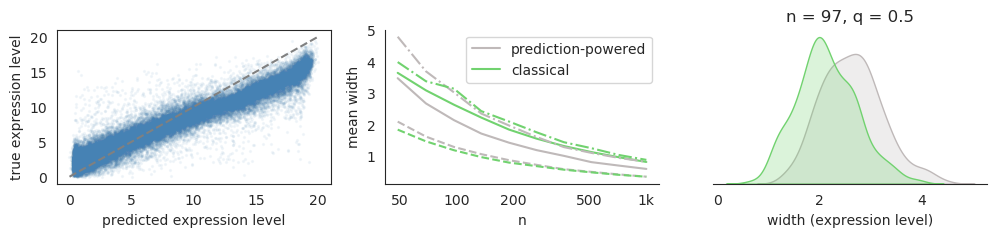

In [9]:
c_cl, c_pp = "#71D26F","#BFB9B9"
ns = np.logspace(np.log10(50), np.log10(1000), num=10, base=10).astype(int)
ns_xticks = [50, 100, 200, 500, 1000]
ns_xticklabels = [50, 100, 200, 500, '1k']
plot_df = df.loc[(df.q == 0.5) & (df.n == 97)]

y_all = native_df.measured.to_numpy()
pred_all = native_df.predicted.to_numpy()
f_all = 20 * (pred_all - np.min(pred_all)) / (np.max(pred_all) - np.min(pred_all))


fig, axs = plt.subplots(1, 3, figsize=(12, 2))

axs[0].scatter(f_all, y_all, s=2, alpha=0.05, c='steelblue');
axs[0].plot([0, 20], [0, 20], linestyle='--', c='gray')
axs[0].set_xlabel('predicted expression level');
axs[0].set_ylabel('true expression level')

for q, ls in zip([0.25, 0.5, 0.75], ['--', '-', '-.']):
    dfqn = df.loc[df.q == q]
    wcl_n = np.array(
        [dfqn.loc[(dfqn.n == n) & (dfqn.estimator == 'classical')].width.mean()for n in ns])
    wpp_n = np.array(
        [dfqn.loc[(dfqn.n == n) & (dfqn.estimator == 'prediction-powered')].width.mean()for n in ns])
    axs[1].plot(ns, wpp_n, label='prediction-powered' if q == 0.5 else None, linestyle=ls, c=c_pp)
    axs[1].plot(ns, wcl_n, label='classical'  if q == 0.5 else None, linestyle=ls, c=c_cl)
    
axs[1].set_xscale('log')
axs[1].set_xticks(ns_xticks)
axs[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[1].set_xticklabels(ns_xticklabels)
axs[1].set_xlabel('n');
axs[1].set_ylabel('mean width')
axs[1].legend();
# axs[1].set_title('native promoters');
sns.despine(ax=axs[1],top=True,right=True)

my_palette = sns.color_palette(["#71D26F","#BFB9B9"], 2)
sns.set_theme(style="white", palette=my_palette)
kde = sns.kdeplot(
    plot_df, x="width", hue="estimator", hue_order=["prediction-powered", "classical"],
    fill=True, ax=axs[2])
kde.get_legend().remove()
sns.despine(ax=axs[2],top=True,right=True,left=True)
axs[2].set_xlabel("width (expression level)")
axs[2].set_ylabel('')
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[2].set_title('n = 97, q = 0.5');
plt.show()